In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import seaborn as sns

In [4]:
data = pd.read_csv("Advertising.csv")
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


### EDA and Feature Engineering 

In [6]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data_features = ProfileReport(data)

variables:   0%|          | 0/4 [00:00<?, ?it/s]

correlations:   0%|          | 0/6 [00:00<?, ?it/s]

interactions [continuous]:   0%|          | 0/16 [00:00<?, ?it/s]

table:   0%|          | 0/1 [00:00<?, ?it/s]

missing:   0%|          | 0/2 [00:00<?, ?it/s]

warnings:   0%|          | 0/3 [00:00<?, ?it/s]

package:   0%|          | 0/1 [00:00<?, ?it/s]

build report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data_features_2 = data_features.to_widgets()


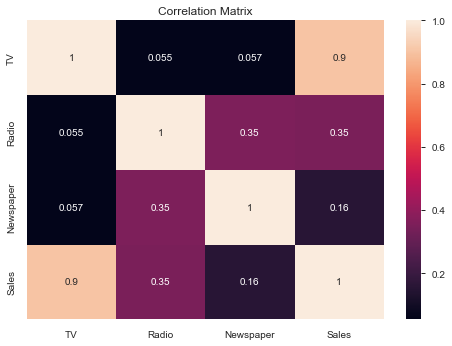

In [16]:
sns.heatmap(data.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

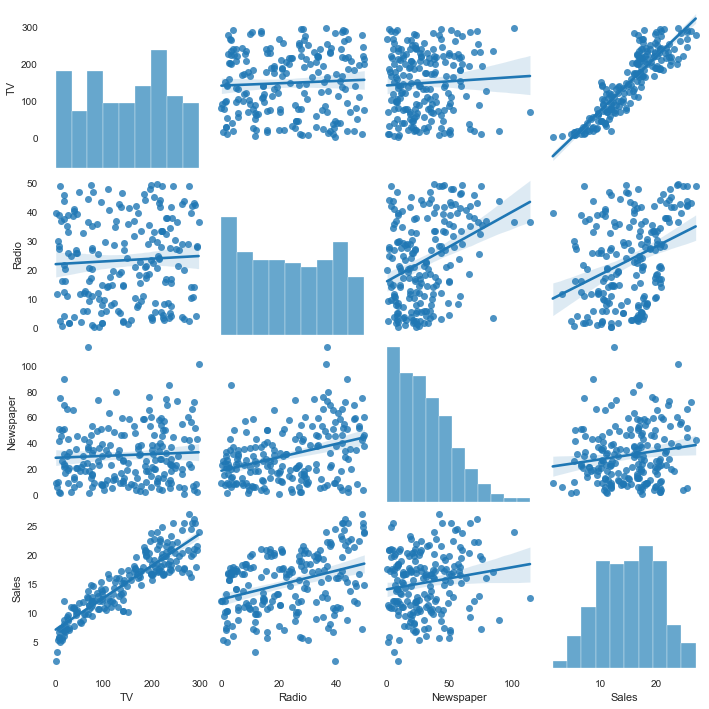

In [18]:
sns.pairplot(data, kind="reg");

### We didnt observed any multi collenear as well as missing values and TV is highly collenear to Sales

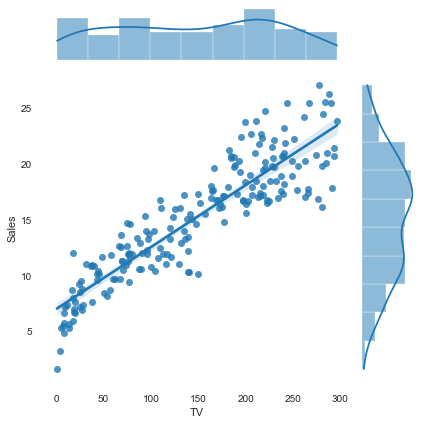

In [20]:
sns.jointplot(x='TV', y='Sales', data=data, kind='reg');

In [23]:
data_features.to_file('salesEDA.html')

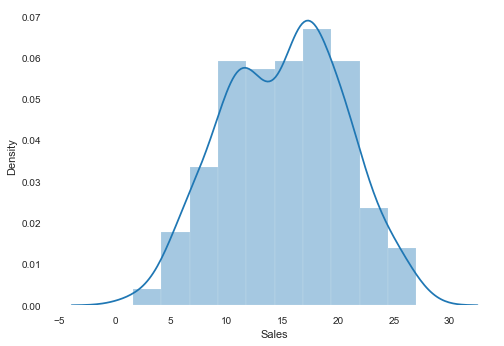

In [26]:
sns.distplot(data['Sales']);


In [29]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from scipy import stats

C:\Users\user\sp_2\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


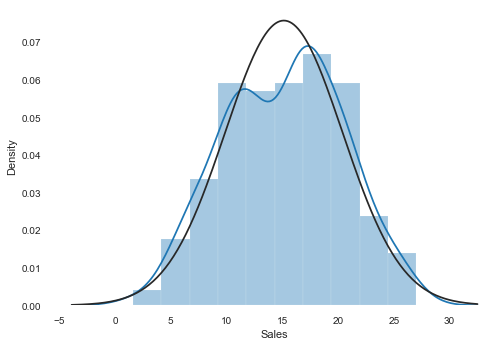

In [7]:
sns.distplot(data['Sales'], fit=stats.norm);

### Model building:

## Need to select features

In [19]:
x = data[["TV"]]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [20]:
y = data.Sales
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

## its a continuous model  ---> we go with regression
## sales = m.TV + C

In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
# regression model to predict sales based on the advertisements
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split, KFold

## we could use tenserflow, pytorch, sparkML etc instead of sklearn

### for more, go through with: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(data[['TV', 'Radio','Newspaper']], data.Sales, test_size=0.2)

In [33]:
model = XGBRegressor(max_depth=8,
                    n_estimators=200,
                    learning_rate=0.05)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [34]:
explained_variance_score(y_pred=y_pred, y_true=ytest)

0.9724942906812049

In [36]:
xtest1 = xtest.copy()
xtest1['y_pred'] = y_pred
xtest1['y'] = ytest
xtest1.head(15)

,TV,Radio,Newspaper,y_pred,y
110,225.8,8.2,56.5,18.278214,18.4
128,220.3,49.0,3.2,22.980486,24.7
30,292.9,28.3,43.2,20.739292,21.4
99,135.2,41.7,45.9,15.546773,17.2
148,38.0,40.3,11.9,10.586651,10.9
82,75.3,20.3,32.5,11.386642,11.3
31,112.9,17.4,38.6,12.840838,11.9
142,220.5,33.2,37.9,18.146448,20.1
72,26.8,33.0,19.3,8.844522,8.8
15,195.4,47.7,52.9,23.636816,22.4


## k-fold cross validation:

In [37]:

kf = KFold(n_splits=5, shuffle=True)
features = ['TV', 'Radio','Newspaper']
score = []
for train_ix, test_ix in kf.split(data):
    # print(train_ix, test_ix)
    train, test = data.loc[train_ix], data.loc[test_ix]
    model = XGBRegressor(max_depth=8,
                    n_estimators=200,
                    learning_rate=0.1)
    model.fit(train[features], train.Sales)
    y_pred = model.predict(test[features])
    scr = explained_variance_score(y_pred=y_pred, y_true=test.Sales)
    score.append(scr)
    print("Explained variance score: ", scr)

Explained variance score:  0.9641350624864538
Explained variance score:  0.9700134383090775
Explained variance score:  0.9491432346732175
Explained variance score:  0.8925925733965939
Explained variance score:  0.9221103447279064


In [38]:
np.mean(score)

0.9395989307186499